<a href="https://colab.research.google.com/github/ns-m/data_analysis/blob/main/Copy_of_Big_Mart_Sales_regression_MLP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load the data
import pandas as pd
train =pd.read_excel("/content/drive/My Drive/Colab Notebooks/Train_UWu5bXk.xlsx")
test = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Test_u94Q5KV.xlsx")

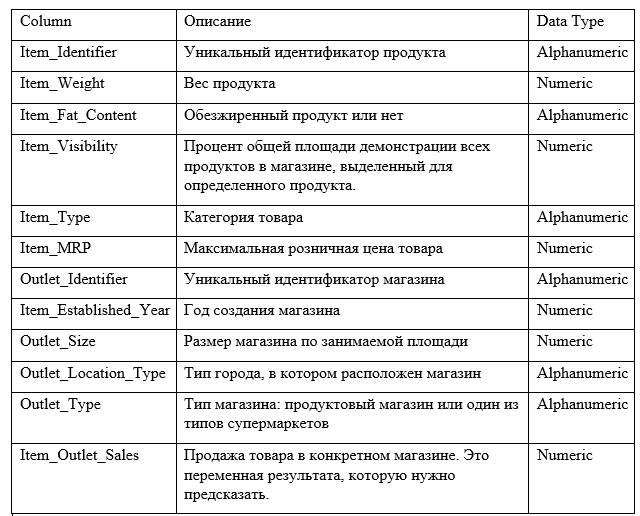

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#Finding the missing values
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Imputing missing values for both train and test
# Step: Replace missing values
train['Item_Weight']=train['Item_Weight'].fillna(train.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
train.Outlet_Size.fillna("неизвестно", inplace=True)

In [ ]:
#Finding the missing values
train.isna().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].median())

In [ ]:
#Finding the missing values
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
#Imputing missing values for both train and test
# Step: Replace missing values
test['Item_Weight']=test['Item_Weight'].fillna(test.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].median())
test.Outlet_Size.fillna("неизвестно", inplace=True)

In [ ]:
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Low Fat, LF and low fat are all same and Regular and reg are same so we need to combine them.
train.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ("Item_Fat_Content", "Item_Identifier","Outlet_Identifier","Outlet_Location_Type","Outlet_Size", "Outlet_Type", "Item_Type")
for c in cols:
    label = LabelEncoder()
    label.fit(list(train[c].values))
    train[c] = label.transform(list(train[c].values))

In [ ]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,3,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [ ]:
#from sklearn.preprocessing import LabelEncoder
cols = ("Item_Fat_Content", "Item_Identifier","Outlet_Identifier","Outlet_Location_Type","Outlet_Size", "Outlet_Type", "Item_Type")
for c in cols:
    label = LabelEncoder()
    label.fit(list(test[c].values))
    test[c] = label.transform(list(test[c].values))

In [ ]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,4,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600,1,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315,1,0.015388,13,155.0340,2,2007,3,1,1
4,1184,13.600,2,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500,2,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000,1,0.073529,8,118.7440,7,2002,3,1,1
5679,517,15.300,2,0.000000,3,214.6218,2,2007,3,1,1


In [ ]:
#Creating a training set for modeling and validation set to check model performance
X = train.drop(['Item_Outlet_Sales'], axis=1)
y = train.Item_Outlet_Sales
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline, make_pipeline

In [ ]:
mm = make_pipeline(MinMaxScaler(), Normalizer())
X_train = mm.fit_transform(X_train)
X_validation = mm.transform(X_validation)

In [ ]:
X_train

array([[0.47187536, 0.38760168, 0.        , ..., 0.47708099, 0.2385405 ,
        0.159027  ],
       [0.41582818, 0.42756232, 0.        , ..., 0.45752846, 0.22876423,
        0.15250949],
       [0.16273994, 0.12685666, 0.        , ..., 0.20765669, 0.62297007,
        0.62297007],
       ...,
       [0.13414412, 0.3276333 , 0.        , ..., 0.16239048, 0.48717143,
        0.32478095],
       [0.26022324, 0.45166317, 0.        , ..., 0.35752011, 0.        ,
        0.        ],
       [0.079243  , 0.45538437, 0.        , ..., 0.38641811, 0.28981358,
        0.19320906]])

In [ ]:
X_validation

array([[0.03070194, 0.38758006, 0.        , ..., 0.19210291, 0.        ,
        0.19210291],
       [0.46548703, 0.11770087, 0.        , ..., 0.16289955, 0.48869865,
        0.3257991 ],
       [0.49456187, 0.39898898, 0.        , ..., 0.        , 0.51368493,
        0.17122831],
       ...,
       [0.26852246, 0.04535661, 0.48988055, ..., 0.16329352, 0.48988055,
        0.48988055],
       [0.34198885, 0.29900247, 0.        , ..., 0.36809577, 0.27607183,
        0.18404789],
       [0.17487568, 0.33094464, 0.        , ..., 0.53214124, 0.26607062,
        0.17738041]])

In [ ]:
#from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense

# Создаем сеть

Выходной слой с одним линейным нейроном - для задачи регрессии функция активации не используется.

Функция ошибки - среднеквадратичное отклонение.
Метрика - среднее абсолютное отклонение.

In [ ]:
model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(X_train.shape[1],)))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Обучение сети

In [ ]:
model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=2) #epochs=500

Epoch 1/300
597/597 - 3s - loss: 5788034.5000 - mae: 1778.9515 - 3s/epoch - 6ms/step
Epoch 2/300
597/597 - 1s - loss: 2853434.0000 - mae: 1281.8862 - 1s/epoch - 2ms/step
Epoch 3/300
597/597 - 1s - loss: 2576470.0000 - mae: 1258.6943 - 1s/epoch - 2ms/step
Epoch 4/300
597/597 - 1s - loss: 2373233.2500 - mae: 1205.1511 - 1s/epoch - 2ms/step
Epoch 5/300
597/597 - 1s - loss: 2186435.2500 - mae: 1151.1884 - 1s/epoch - 2ms/step
Epoch 6/300
597/597 - 1s - loss: 2034544.1250 - mae: 1104.3253 - 1s/epoch - 2ms/step
Epoch 7/300
597/597 - 1s - loss: 1913250.0000 - mae: 1062.2133 - 1s/epoch - 2ms/step
Epoch 8/300
597/597 - 1s - loss: 1821225.3750 - mae: 1027.1827 - 1s/epoch - 2ms/step
Epoch 9/300
597/597 - 1s - loss: 1754362.6250 - mae: 1003.5002 - 1s/epoch - 2ms/step
Epoch 10/300
597/597 - 1s - loss: 1705318.2500 - mae: 984.0916 - 1s/epoch - 2ms/step
Epoch 11/300
597/597 - 1s - loss: 1671415.3750 - mae: 972.9443 - 1s/epoch - 2ms/step
Epoch 12/300
597/597 - 1s - loss: 1645341.1250 - mae: 963.2770 - 

# Оценка точности работы сети

In [ ]:
mse, mae = model.evaluate(X_validation, y_validation, verbose=0)

In [ ]:
print("Средняя абсолютная ошибка :", mae)

Средняя абсолютная ошибка : 833.3257446289062


In [ ]:
print("Среднеквадратическая ошибка ошибка :", mse)

Среднеквадратическая ошибка ошибка : 1277514.0


In [ ]:
rmse = np.sqrt(mse)
rmse

1130.2716487641367

In [ ]:
# print the R-squared
from sklearn.metrics import r2_score
print("The R-squared value is: {0:0.4f} \n".format(r2_score(y_train,model.predict(X_train))))

187/187 [==============================] - 0s 1ms/step
The R-squared value is: 0.5716 



In [ ]:
# print the R-squared
from sklearn.metrics import r2_score
print("The R-squared value is: {0:0.4f} \n".format(r2_score(y_validation,model.predict(X_validation))))

80/80 [==============================] - 0s 1ms/step
The R-squared value is: 0.5686 



# Использование сети для предсказания цен недвижимости

In [ ]:
predicted_NN = model.predict(X_validation)
predicted_NN

80/80 [==============================] - 0s 1ms/step


array([[ 789.9735],
       [1583.1306],
       [3566.3452],
       ...,
       [3508.3035],
       [3685.287 ],
       [ 706.6446]], dtype=float32)

In [ ]:
predicted_NN.shape

(2557, 1)

In [ ]:
y_validation

345      703.0848
2042    3091.9752
3842    4364.3190
1139    2399.5432
4530    1162.4868
          ...    
8353    1482.0708
3874    2450.1440
6279    1565.9616
402     6911.0040
4577     407.4696
Name: Item_Outlet_Sales, Length: 2557, dtype: float64

In [ ]:
X_validation.shape

(2557, 11)

In [ ]:
import pandas as pd
pd.DataFrame(predicted_NN).to_csv("predicted_NN.csv")